In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Step 1: Load the data
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url)

In [ ]:
# Filter the data for specific countries and dates
countries = ['United States', 'India', 'Brazil', 'United Kingdom', 'Germany']
data = data[data['location'].isin(countries)]
data = data[data['date'] >= '2021-01-01']
data = data[['date', 'location', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']]

# Process the data to create a summary for each country
summary = data.groupby('location').max().reset_index()

# Extract data for line chart (trend over time for the United States)
us_data = data[data['location'] == 'United States']

# Calculate the percentage distribution of vaccination stages
latest_data = data.groupby('location').max().reset_index()
latest_data['first_dose_percentage'] = latest_data['people_vaccinated'] / latest_data['total_vaccinations']
latest_data['second_dose_percentage'] = latest_data['people_fully_vaccinated'] / latest_data['total_vaccinations']
latest_data['booster_percentage'] = (latest_data['total_vaccinations'] - latest_data['people_vaccinated'] - latest_data['people_fully_vaccinated']) / latest_data['total_vaccinations']

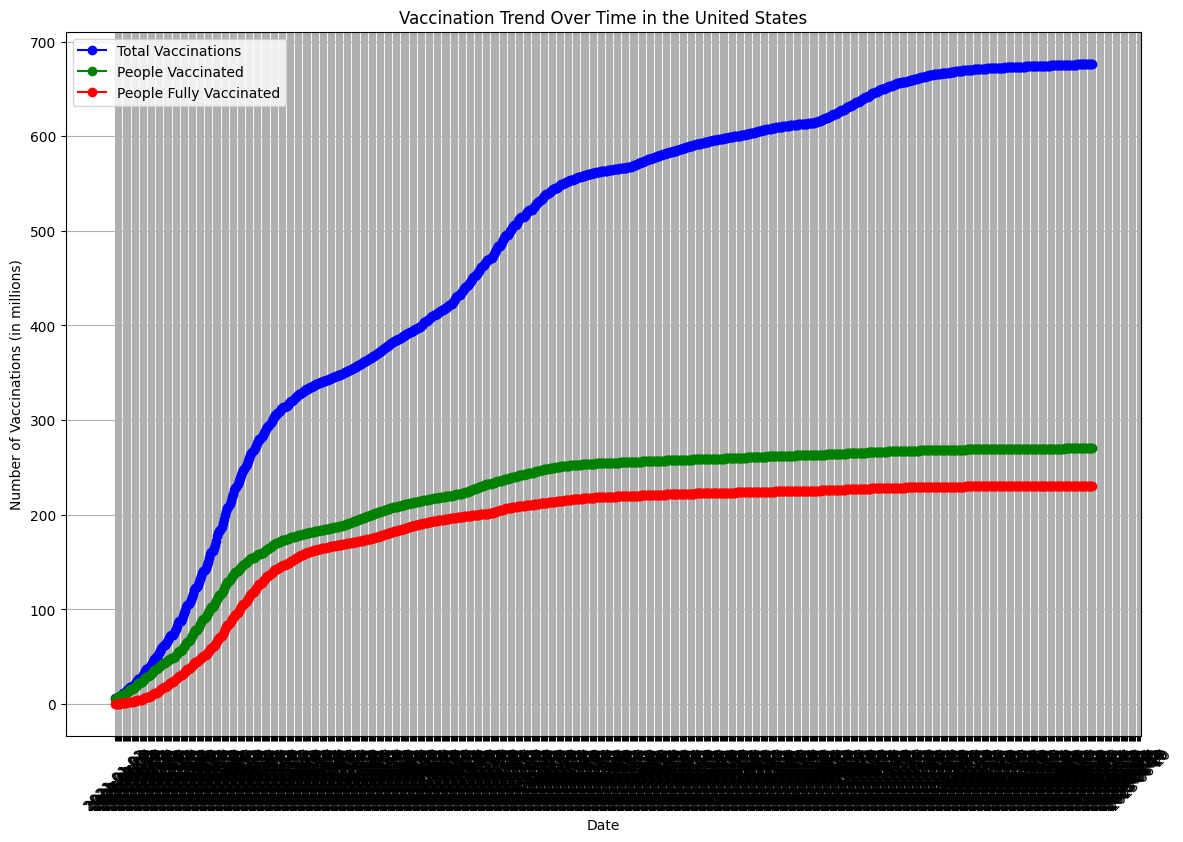

In [ ]:
# Generate a line chart for the trend of vaccinations over time in the United States
plt.figure(figsize=(12, 8))
plt.plot(us_data['date'], us_data['total_vaccinations'] / 1e6, marker='o', linestyle='-', color='blue', label='Total Vaccinations')
plt.plot(us_data['date'], us_data['people_vaccinated'] / 1e6, marker='o', linestyle='-', color='green', label='People Vaccinated')
plt.plot(us_data['date'], us_data['people_fully_vaccinated'] / 1e6, marker='o', linestyle='-', color='red', label='People Fully Vaccinated')

plt.title('Vaccination Trend Over Time in the United States')
plt.xlabel('Date')
plt.ylabel('Number of Vaccinations (in millions)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig('US_Vaccination_Trend.png')
plt.show()

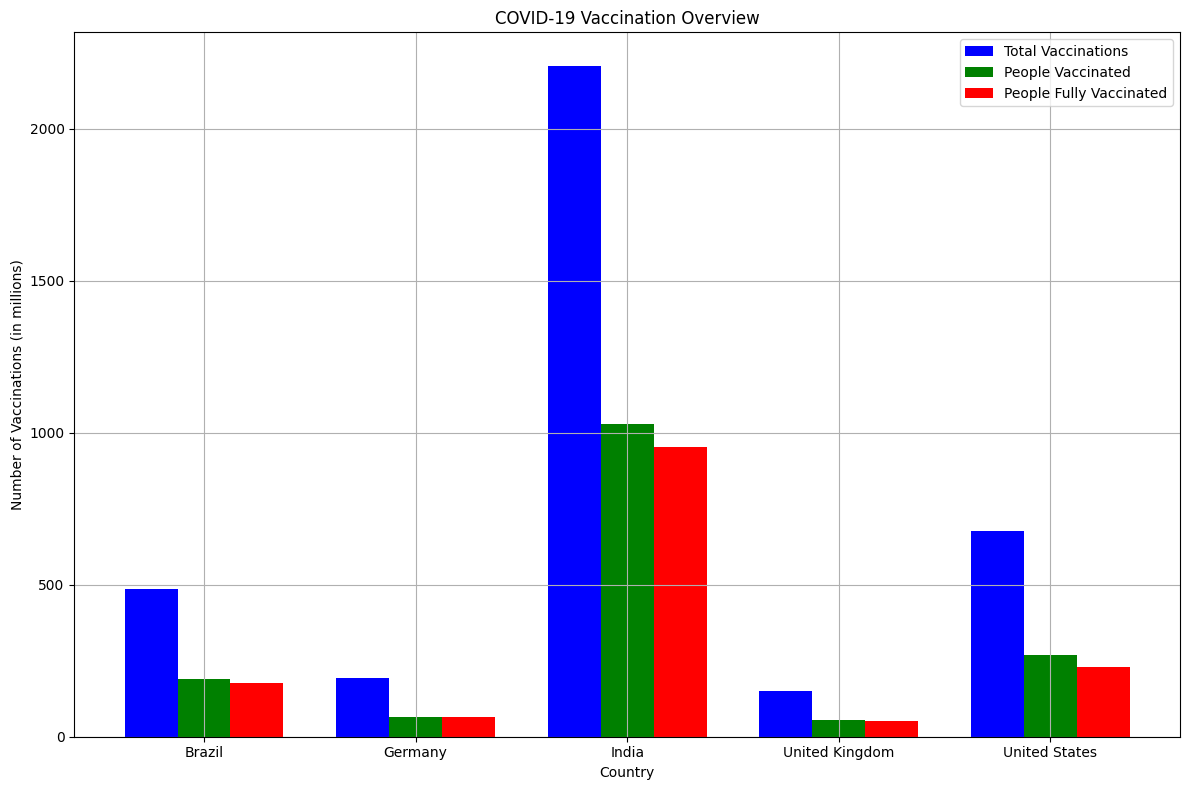

In [ ]:
# Generate a bar chart to compare vaccination rates across different countries
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.25
x = range(len(summary['location']))

ax.bar(x, summary['total_vaccinations'] / 1e6, bar_width, label='Total Vaccinations', color='blue')
ax.bar([p + bar_width for p in x], summary['people_vaccinated'] / 1e6, bar_width, label='People Vaccinated', color='green')
ax.bar([p + bar_width * 2 for p in x], summary['people_fully_vaccinated'] / 1e6, bar_width, label='People Fully Vaccinated', color='red')

ax.set_xlabel('Country')
ax.set_ylabel('Number of Vaccinations (in millions)')
ax.set_title('COVID-19 Vaccination Overview')
ax.set_xticks([p + bar_width for p in x])
ax.set_xticklabels(summary['location'])
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.savefig('Vaccination_Rates_Bar_Chart.png')
plt.show()

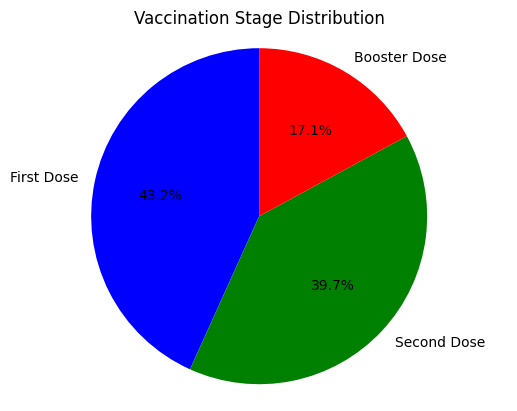

In [ ]:
# Generate a pie chart to display the percentage distribution of vaccination stages
# Use the latest data for all countries combined
total_vaccinations = latest_data['total_vaccinations'].sum()
first_dose = latest_data['people_vaccinated'].sum()
second_dose = latest_data['people_fully_vaccinated'].sum()
booster = total_vaccinations - first_dose - second_dose

labels = 'First Dose', 'Second Dose', 'Booster Dose'
sizes = [first_dose, second_dose, booster]
colors = ['blue', 'green', 'red']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Vaccination Stage Distribution')
plt.savefig('Vaccination_Stages_Pie_Chart.png')
plt.show()
